In [35]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

In [36]:
with open("simu5_data/simu5_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
df_study = df_study.loc[df_study.session < 30]
df_test = df_test.loc[df_test.session < 30]

In [37]:
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,list,session
0,1071,857,PIMPLE,MAILBOX,0,0
1,309,1029,CIGARETTE,PAW,0,0
2,624,700,GARLIC,HEEL,0,0
3,195,1389,BULLETIN,STRANGER,0,0
4,580,392,FLIPPER,COUSIN,0,0
...,...,...,...,...,...,...
14035,908,733,MONEY,IDOL,77,29
14036,118,1123,BELL,PRIMATE,77,29
14037,1410,141,SUPERVISOR,BLUEJAY,77,29
14038,206,102,BUTTERFLY,BAY,77,29


In [38]:
df_test

,test_itemno,test_item,correct_ans,lag,list,session
0,580,FLIPPER,392,1,0,0
1,744,IRON,245,3,1,0
2,316,CLAMP,958,5,2,0
3,109,BEAVER,1326,2,3,0
4,768,KANGAROO,1632,0,4,0
...,...,...,...,...,...,...
2335,462,DICTATOR,1438,4,73,29
2336,574,FLANNEL,1553,0,74,29
2337,922,MOTOR,278,0,75,29
2338,1418,SWATTER,1120,2,76,29


### Run CMR-IA

In [39]:
s_mat = np.load('../../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [40]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.5,
    beta_cue = 0.45,
    beta_distract = 0.1,
    beta_rec_post = 0.99,
    gamma_fc = 0.7,
    gamma_cf = 0.5,
    s_fc = 0.1,
    s_cf = 0.1,
    c_thresh = 0.01,
    kappa = 0.08,
    lamb = 0.05,
    eta = 0.02,
    phi_s = 1.6,  # control the overall f_dif correct
    phi_d = 1.1,  # control the curve of last three, higher then upper, mediated by phi_s
    nitems_in_accumulator = 48,
    d_ass = 0.8,
    alpha = 0.5,
)
params

{'beta_enc': 0.5,
 'beta_rec': 0.5,
 'beta_cue': 0.45,
 'beta_rec_post': 0.99,
 'beta_distract': 0.1,
 'phi_s': 1.6,
 'phi_d': 1.1,
 's_cf': 0.1,
 's_fc': 0.1,
 'kappa': 0.08,
 'eta': 0.02,
 'omega': 5,
 'alpha': 0.5,
 'c_thresh': 0.01,
 'c_thresh_itm': 0.5,
 'c_thresh_ass': 0.5,
 'd_ass': 0.8,
 'lamb': 0.05,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 48,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.7,
 'gamma_cf': 0.5,
 'use_new_context': False}

In [41]:
df_simu, f_in, f_dif = cmr.run_norm_cr_multi_sess(params,df_study, df_test ,s_mat)
df_simu

CMR2 Time: 142.81263327598572


,list,session,test_itemno,s_resp,s_rt,csim
0,0,0,580,1605.0,1180.0,0.893381
1,1,0,744,245.0,2340.0,0.794698
2,2,0,316,1583.0,1500.0,0.836788
3,3,0,109,1080.0,2690.0,0.866095
4,4,0,768,1632.0,2110.0,0.943911
...,...,...,...,...,...,...
2335,73,29,462,1438.0,2340.0,0.725678
2336,74,29,574,1553.0,2550.0,0.944590
2337,75,29,922,278.0,1830.0,0.944757
2338,76,29,1418,1115.0,2220.0,0.872459


In [42]:
df_simu = df_simu.merge(df_test,on=['session','test_itemno'])
df_simu['correct'] = df_simu.s_resp == df_simu.correct_ans
df_simu

,list_x,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,lag,list_y,correct
0,0,0,580,1605.0,1180.0,0.893381,FLIPPER,392,1,0,False
1,1,0,744,245.0,2340.0,0.794698,IRON,245,3,1,True
2,2,0,316,1583.0,1500.0,0.836788,CLAMP,958,5,2,False
3,3,0,109,1080.0,2690.0,0.866095,BEAVER,1326,2,3,False
4,4,0,768,1632.0,2110.0,0.943911,KANGAROO,1632,0,4,True
...,...,...,...,...,...,...,...,...,...,...,...
2335,73,29,462,1438.0,2340.0,0.725678,DICTATOR,1438,4,73,True
2336,74,29,574,1553.0,2550.0,0.944590,FLANNEL,1553,0,74,True
2337,75,29,922,278.0,1830.0,0.944757,MOTOR,278,0,75,True
2338,76,29,1418,1115.0,2220.0,0.872459,SWATTER,1120,2,76,False


In [43]:
# f_in

In [44]:
sessions = df_simu.session.to_numpy()
for sess in sessions:
    df_tmp = df_study.loc[df_study.session == sess]
    tmp1 = df_tmp.study_itemno1.to_numpy()
    tmp2 = df_tmp.study_itemno2.to_numpy()
    tmp = np.concatenate((tmp1, tmp2))
    tmp = np.sort(tmp)

    this_df = df_simu.query(f"session=={sess}")
    testid = np.searchsorted(tmp, this_df.test_itemno)
    corrid = np.searchsorted(tmp, this_df.correct_ans)

    df_simu.loc[df_simu.session == sess, 'corr_fin'] = [f_dif[sess][l][i] for l,i in enumerate(corrid)]
    df_simu.loc[df_simu.session == sess, 'omax_fin'] = [np.delete(f_dif[sess][l], i).max() for l,i in enumerate(corrid)]

df_simu

,list_x,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,lag,list_y,correct,corr_fin,omax_fin
0,0,0,580,1605.0,1180.0,0.893381,FLIPPER,392,1,0,False,-0.177620,-0.194986
1,1,0,744,245.0,2340.0,0.794698,IRON,245,3,1,True,-0.263665,-0.226055
2,2,0,316,1583.0,1500.0,0.836788,CLAMP,958,5,2,False,-0.329162,-0.237173
3,3,0,109,1080.0,2690.0,0.866095,BEAVER,1326,2,3,False,-0.263489,-0.200612
4,4,0,768,1632.0,2110.0,0.943911,KANGAROO,1632,0,4,True,-0.129559,-0.317149
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,73,29,462,1438.0,2340.0,0.725678,DICTATOR,1438,4,73,True,-0.267038,-0.212856
2336,74,29,574,1553.0,2550.0,0.944590,FLANNEL,1553,0,74,True,-0.127863,-0.303822
2337,75,29,922,278.0,1830.0,0.944757,MOTOR,278,0,75,True,-0.154639,-0.283251
2338,76,29,1418,1115.0,2220.0,0.872459,SWATTER,1120,2,76,False,-0.229658,-0.202130


In [45]:
# df_simu.to_pickle("simu5_data/simu5_result.pkl")

### PLOT

In [46]:
# with open("simu5_data/simu5_result.pkl", 'rb') as inp:
#     df_simu = pickle.load(inp)

In [47]:
df_fin = df_simu.groupby('lag')[['corr_fin','omax_fin']].mean().reset_index()
df_fin['dif'] = df_fin['corr_fin'] - df_fin['omax_fin']
df_fin

,lag,corr_fin,omax_fin,dif
0,0,-0.131964,-0.295264,0.163301
1,1,-0.176818,-0.210268,0.033449
2,2,-0.222043,-0.221603,-0.000440
3,3,-0.257881,-0.229138,-0.028743
4,4,-0.264809,-0.232112,-0.032696
5,5,-0.279098,-0.240154,-0.038943


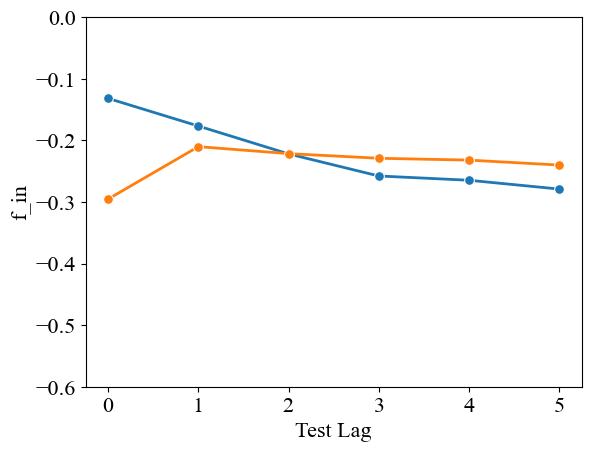

In [48]:
sns.lineplot(data=df_fin, x='lag', y='corr_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omean_fin', linewidth=2, marker='o', markersize = 7)
sns.lineplot(data=df_fin, x='lag', y='omax_fin', linewidth=2, marker='o', markersize = 7)
plt.ylim([-0.6,0])
plt.xlabel('Test Lag')
plt.ylabel('f_in')
# plt.savefig('fig/simu3_hr.pdf')
plt.show()

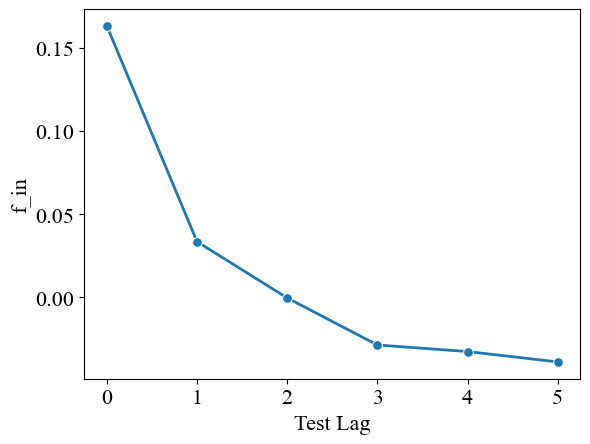

In [49]:
sns.lineplot(data=df_fin, x='lag', y='dif', linewidth=2, marker='o', markersize = 7)
# plt.ylim([0,1])
plt.xlabel('Test Lag')
plt.ylabel('f_in')
# plt.savefig('fig/simu3_hr.pdf')
plt.show()

In [50]:
df_laggp = df_simu.groupby(['lag']).correct.mean().to_frame(name='corr_rate').reset_index()
df_laggp

,lag,corr_rate
0,0,0.839109
1,1,0.454545
2,2,0.306452
3,3,0.226190
4,4,0.239401
5,5,0.249322


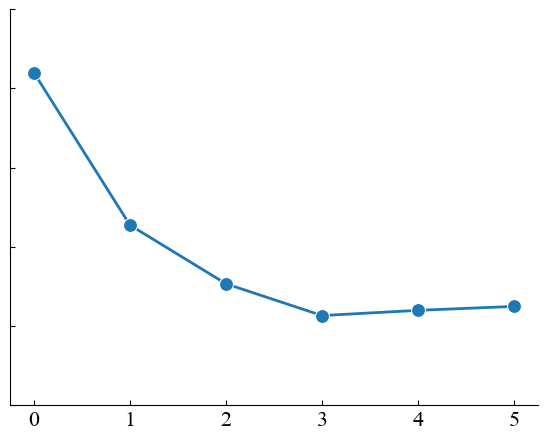

In [51]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_laggp, x='lag', y='corr_rate', linewidth=2, marker='o', markersize = 10)
plt.ylim([0,1])
plt.xlabel('Test Lag')
plt.ylabel('Probablility of Recall')
ax.set(xlabel=None, ylabel=None)
plt.tick_params(labelleft=False)

# plt.savefig('simu5_fig/simu5_recall.pdf')
plt.show()